# Generating Random Variables

A **random variates** is an outcome or the realization of a random variable.

Random variables can also be seen as functions of uniform variates transformed by a **generalized inverse function**.

Thus, if $F$ is a CDF, which is a non-decreasing function on $\mathbf{R}$,
then the generalized inverse function of $F$, $F^{-}$, is defined as
$$
F^- (u) = \inf \{ x : F(x) \geq u \}
$$

So out of all the $x$s which would result in $F(x) \geq u$, the generalized inverse function of the CDF $F$ is the
greatest lower bound of such set.
Or said even in another way, the generalized inverse function of $u$ corresponds to the smallest $x$ for which $F(x) \geq u$.

Since the generalized inverse function of $F$ is $\inf\{x : F(x) \geq u \}$, then it satisfies
$F \left( F^- (u) \right) \geq u$. If $F^-$ gives us an $x$ such that $F(x) \geq u$, then applying $F$ on such $x$ just gets us back to $F(x) \geq u$.

Similarly, because $F^-$ is the infinumum of a set of $x$s, any $x$ should be greater than or equal to $F^- \left( F(x) \right)$, and thus $F^- \left( F(x) \right) \leq x$.

These two explanations can also be expressed as
$$
\{ (u, x) : F(x) \geq u \} =
\{ (u, x) : F^- (u) \leq x \}
$$

And since these two are subsets of the sample space, we can express them as probabilities:
$$
P(F(x) \geq U) = P( F^-(U) \leq x)
$$

If we look specifically at $P(U \leq F(x))$ and if we recall the definition of the CDF,
namely $F(x) = P(X \leq x)$, then
$$
P(U \leq F(x)) = F(x)
$$

The notariety of the last result is that since
$$
\{ (u, x) : F(x) \geq u \} =
\{ (u, x) : F^- (u) \leq x \}
$$
and
$$
P(U \leq F(x)) = F(x) = F_U (x)
$$

Then $F^- (u)$ when $U \sim U[0,1]$ has the same distribution as $F$.
This is the **probability integral transform**.
The above proof came from casella's Monte Carlo Statistical Methods, Lemma 2.4 on page 39.

Another proof is presented by Casella in Statistical Inference. It is theorem 2.1.10 on page 54.

For $Y = F_X (X)$, we have for $y \in [0,1]$ (Casella erroneously, we think, has $y \in (0,1)$)
$$
F_Y (y) = P(Y \leq y) = P(F_X (X) \leq y)
$$

The next step is to make use of the **quantile function**, which is another name for the generalized inverse function we defined above.
The quantile function is increasing so we can do the following
$$
P(F_X (X) \leq y)
= P(F^- \left( F_X (X) \right) \leq F^- (y) )
= P(X \leq F^- (y) )
$$

Here again we can invoke the definition of the CDF,

$$
P(X \leq F^- (y) )
= F_X \left( F^- (y) \right)
= y
$$

Which is another way of saying that $Y$ has a uniform distribution on the interval $[0,1]$.
Which in turn says that $F_Y (y)$ is the CDF of a random variable following the uniform distribution.

The [wikipedia page](https://en.wikipedia.org/wiki/Probability_integral_transform) has some interesting blurbs about applications.

## Changing Variables

There is a result from calculus that is presented a bit like this (the following presentation comes from
[Paul's Online Notes: Section 15.8 : Change of Variables](https://tutorial.math.lamar.edu/classes/calciii/changeofvariables.aspx)):

If we define the Jacobian of a transformation $x = g(u,v)$, $y = h(u,v)$ as
$$
\frac{ \partial (x,y) }{ \partial (u,v) } = 
\begin{vmatrix}
\frac{ \partial x }{ \partial u } \frac{ \partial x }{ \partial v } \\
\frac{ \partial y }{ \partial u } \frac{ \partial y }{ \partial v }
\end{vmatrix}
$$

Then if we want to integrate $f(x)$ over some surface $R$, this region will become some other surface $S$ following our transformation and he integral can be computed as follows:
$$
\int \int_{R} f(x,y) dA
= \int \int_{S} f\left( g(u,v), h(u,v) \right) \Biggl| \frac{ \partial (x,y) }{ \partial (u,v) } \Biggl| d\overline{A}
$$

For example, when we go from Euclidean to polar coordinates, the transofrmation we use is $x = r\cos\theta$
and $y = r\sin\theta$ and the Jacobian is $r$ so $dA = dx dy = r dr d\theta$.

In 3-dimensions this extends to
$$
\int \int \int_{V} f(x,y,z) dV
= \int \int \int_{B} f\left( g(u,v,w), h(u,v,w), k(u,v,w) \right) \Biggl| \frac{ \partial (x,y,z) }{ \partial (u,v,w) } \Biggl| d\overline{V}
$$

For the case of the transformation of Euclidean coordinates to spherical coordinates, the transformation of variables is
$x = r \sin\phi \cos\theta $, $y = r \sin\phi \sin\theta$, and $z = r\cos\phi$.
In that case the Jacobian is $r^2 \sin\phi$ and thus $dV = dx dy dz = r^2 \sin\phi dr d\phi d\theta$.

---

We will now replicate [How do distributions transform under a change of variables ?](https://nbviewer.org/github/cranmer/intro-exp-phys-II/blob/master/change-of-variables.ipynb) ('cas we never know when things will dissapear from the internet and to see if it can be reproduced with newer versions of our software).

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# generate samples for x, evaluate y=cos(x)
n_samples = 100_000
x = np.random.uniform(0,2*np.pi,n_samples)
y = np.cos(x)

In [23]:
from typing import Literal, get_args, get_origin
from sys import _getframe

def enforce_literals(function):
    """
    Taken from
    https://stackoverflow.com/questions/9522877/pythonic-way-to-have-a-choice-of-2-3-options-as-an-argument-to-a-function
    inspect.stack()[1] (963 usec) to sys._getframe(1) (1.2 usec).
    Should have used inspect.currentframe().f_back (2.7 usec) from the start but sys is even better!
    """
    kwargs = _getframe(1).f_locals
    for name, type_ in function.__annotations__.items():
        value = kwargs.get(name)
        options = get_args(type_)
        if get_origin(type_) is Literal and name in kwargs and value not in options:
            raise AssertionError(f"'{value}' is not in {options} for '{name}'")


_DIST_TYPES = Literal["normal", "uniform"]

In [40]:
import functools
import matplotlib.animation as animation
from IPython.display import HTML

# Example taken from
# https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py


# Histogram our data with numpy.
def generator(rng, /, num_samples: int =1_000, *, dist_type: _DIST_TYPES):
    """
    https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator
    """
    enforce_literals(generator) # Assert dist_type.

    match dist_type:
        case "normal":
            return rng.standard_normal(num_samples)
        case "uniform":
            return rng.uniform(0, 1, num_samples)
        case _:
            # Using this sort of logic we do not need to use `enforce_literals`
            # but we are trying things out and leaving some trails for later.
            raise ValueError(f"{dist_type} is not valid")


# Setting up a random number generator with a fixed state for reproducibility.
rng = np.random.default_rng(seed=123)
# Fixing bin edges.
num_samples = 1_000
num_bins = 100
dist_type = "normal"

data = generator(rng, num_samples=num_samples, dist_type=dist_type)
n, _ = np.histogram(data, bins=num_bins)

def animate(frame_number, bar_container):
    # Simulate new data coming in.
    data = generator(rng, num_samples=num_samples, dist_type=dist_type)
    n, _ = np.histogram(data, bins=num_bins, density=True)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    return bar_container.patches

# Using hist() allows us to get an instance of BarContainer, which is a collection of Rectangle instances.
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, bins=num_bins, density=True, alpha=0.6, lw=1, edgecolor="black")
#_, _, bar_container = ax.hist(data, bins=num_bins, density=True, lw=1, ec="yellow", facecolor="green", alpha=0.5)
#ax.set_xlim(0,1)
#ax.set_ylim(top=0.6)  # set safe limit to ensure that all data is visible.

# Since FuncAnimation will only pass the frame number parameter to the animation function,
# we use functools.partial to fix the bar_container parameter.
# See https://docs.python.org/3/library/functools.html
anim = functools.partial(animate, bar_container=bar_container)
ani = animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)

# Output generated via `matplotlib.animation.Animation.to_jshtml`.
plt.close(fig) # Used to prevent the PNG from showing.
HTML(ani.to_jshtml())

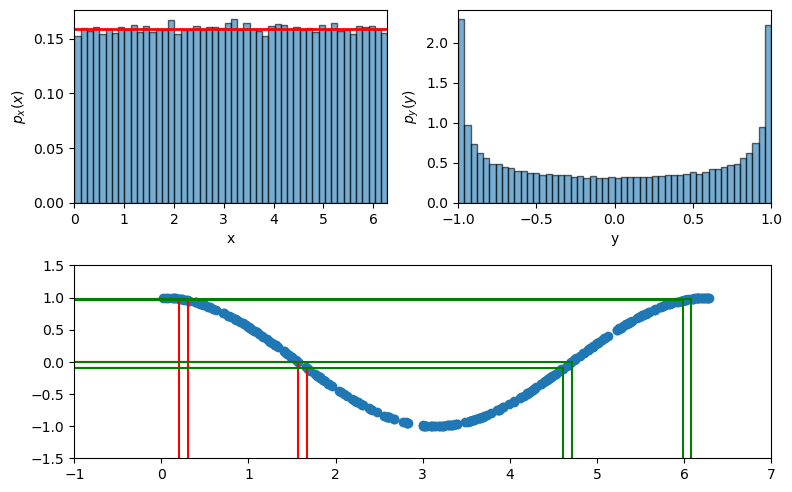

In [65]:
# make a histogram of x.
n_bins = 50


# Plot the things.
# There is a subplot_mosaic function we could also use:
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/label_subplots.html
fig = plt.figure( figsize=(8, 5))
ax1 = fig.add_subplot(221)
counts, bins, patches = ax1.hist(x, bins=50, density=True, alpha=0.6, lw=1, edgecolor="black")
ax1.plot([0,2*np.pi], (1./(2 * np.pi), 1./(2 * np.pi)), lw=2, c='r')
ax1.set_xlim(0,2*np.pi)
ax1.set_xlabel('x')
ax1.set_ylabel('$p_x(x)$')


ax2 = fig.add_subplot(222)
counts, y_bins, patches = ax2.hist(y, bins=50, density=True, alpha=0.6, lw=1, edgecolor="black")
ax2.set_xlim(-1, 1)
ax2.set_xlabel('y')
ax2.set_ylabel('$p_y(y)$')


# make a scatter of x,y.
ax3 = fig.add_subplot(212)
ax3.scatter(x[:300],y[:300]) #just the first 300 points

xtest = .2
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='r')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='r')
xtest = xtest+.1
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='r')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='r')

xtest = 2*np.pi-xtest
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='g')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='g')
xtest = xtest+.1
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='g')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='g')


xtest = np.pi/2
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='r')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='r')
xtest = xtest+.1
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='r')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='r')

xtest = 2*np.pi-xtest
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='g')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='g')
xtest = xtest+.1
ax3.plot((-1,xtest),    (np.cos(xtest),np.cos(xtest)), c='g')
ax3.plot((xtest,xtest), (-1.5,np.cos(xtest)),          c='g')


plt.ylim(-1.5,1.5)
plt.xlim(-1,7)

fig.tight_layout(pad=1.0)
plt.show()

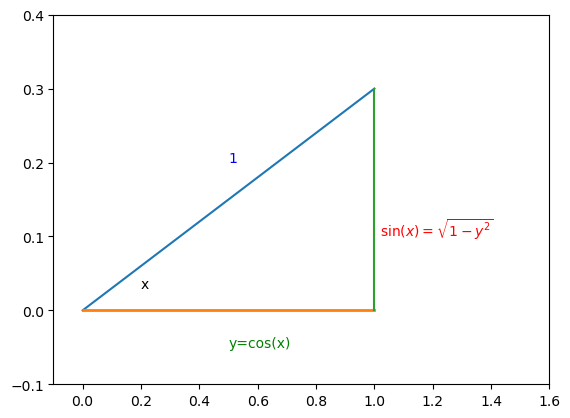

In [66]:
plt.plot((0.,1), (0,.3))
plt.plot((0.,1), (0,0), lw=2)
plt.plot((1.,1), (0,.3))
plt.ylim(-.1,.4)
plt.xlim(-.1,1.6)
plt.text(0.5,0.2, '1', color='b')
plt.text(0.2,0.03, 'x', color='black')
plt.text(0.5,-0.05, 'y=cos(x)', color='g')
plt.text(1.02,0.1, '$\sin(x)=\sqrt{1-y^2}$', color='r')

plt.show()

## References

1. [Paul's Online Notes: Section 15.8 : Change of Variables](https://tutorial.math.lamar.edu/classes/calciii/changeofvariables.aspx)
1. [Home Campus Bookshelves Monroe Community College MTH 212 Calculus III Chapter 14: Multiple Integration 14.7: Change of Variables in Multiple Integrals (Jacobians) ](https://math.libretexts.org/Courses/Monroe_Community_College/MTH_212_Calculus_III/Chapter_14%3A_Multiple_Integration/14.7%3A_Change_of_Variables_in_Multiple_Integrals_(Jacobians))
1. [How do distributions transform under a change of variables ?](https://nbviewer.org/github/cranmer/intro-exp-phys-II/blob/master/change-of-variables.ipynb)